In [36]:
import pandas as pd
import numpy as np 
from sklearn import tree
from sklearn.model_selection import train_test_split
np.random.seed(0)

In [37]:
df = pd.read_csv('train_iris.csv')
df.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [38]:
X_train = df[['sepal length', 'sepal width', 'petal length', 'petal width']]
y_train = df['species']


In [39]:
df_test = pd.read_csv('test_iris.csv')
X_test = df_test[['sepal length', 'sepal width', 'petal length', 'petal width']]
y_test = df_test['species']

In [40]:
test_data = pd.DataFrame(columns=['max_depth', 'train_score', 'test_score'])
max_depth = range(1, 100)
for depth in max_depth:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=depth)
    clf.fit(X_train, y_train)
    temp = pd.DataFrame({'max_depth' : [depth], 'train_score' : [clf.score(X_train, y_train)], 'test_score' :  [clf.score(X_test, y_test)]})
    test_data = pd.concat([test_data, temp])

/var/folders/zz/zyxvpxvq6csfxvn_n003wv4r00z6s6/T/ipykernel_40699/2680471082.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  test_data = pd.concat([test_data, temp])


In [41]:
test_data

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92
...,...,...,...
0,95,1.00,0.92
0,96,1.00,0.92
0,97,1.00,0.92
0,98,1.00,0.94


<Axes: xlabel='max_depth'>

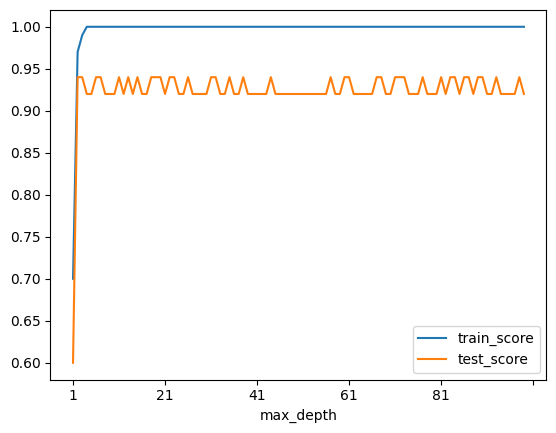

In [42]:
import seaborn as sns

test_data.plot(x='max_depth', y=['train_score', 'test_score'], legend=True)